# PDL Lab6. Text corpus creation and binary classification using DNN

###  1. Dataset Creation: Create a dataset of 20 lines of text for class 1: motivational lines(each line considered as document) and 20 lines of text for class 2: demotivationallines. 20 lines of text per class and store them in text file.

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus-2022\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus-2022\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv("Quotes.csv",encoding='cp1252')

In [3]:
df.shape

(40, 2)

In [4]:
df.head()

,Text,Target
0,Every dead body on Mt. Everest was once a high...,1
1,Light travels faster than sound. This is why s...,1
2,Just because we accept you as you are doesn’t ...,1
3,Idiocy – never underestimate the power of stup...,1
4,"If life doesn’t break you today, don’t worry. ...",1


In [5]:
df.groupby('Target').count()

,Text
Target,
0,20
1,20


### 2. Pre-processing:

In [6]:
df['Text']

0     Every dead body on Mt. Everest was once a high...
1     Light travels faster than sound. This is why s...
2     Just because we accept you as you are doesn’t ...
3     Idiocy – never underestimate the power of stup...
4     If life doesn’t break you today, don’t worry. ...
5     People who say they’ll give 110% don’t underst...
6     A thousand-mile journey starts with one step. ...
7     If you never try anything new, you’ll miss out...
8     Two things are infinite: the universe and huma...
9     If at first, you don't succeed, try, try again...
10    Today is the first day of the rest of your lif...
11    It could be that your purpose in life is to se...
12    Just because you are unique doesn't mean you a...
13    Oh, you hate your job? Why didn’t you say so? ...
14    I am free of all prejudice. I hate everyone eq...
15    Multitasking – the art of doing twice as much ...
16    Always remember that you are absolutely unique...
17    The story so far: In the beginning, the Un

In [7]:
X=df['Text']
y=df['Target']

In [8]:
lemmatizer=WordNetLemmatizer()

In [9]:
def clean_review(review):

    tokens = review.lower().split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(filtered_tokens)

In [10]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus-2022\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
temp=X.tolist()
fax=[]
for i in temp:
    fax.append(clean_review(i))
n_X=pd.Series(fax)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(n_X)
features_name = tfidf.get_feature_names()
text_vect = pd.DataFrame(vectors.todense(),columns=features_name)
text_vect

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,110,abandoned,absolutely,accept,action,adam,again,already,always,angry,...,whether,widely,will,willing,wish,work,worry,yesterday,you,yourself
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.349938,0.000000,0.349938,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219023,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.407188,0.000000,0.000000,0.000000
5,0.341752,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.341752,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.275951,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211986,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.288800,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
import tensorflow as tf
temp = tf.Variable(text_vect)

### 3. Dataset Preparation:

In [14]:
X_train,X_test,y_train,y_test=train_test_split(text_vect,y,train_size=0.75,test_size=0.25)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 255)
(30,)
(10, 255)
(10,)


### 4. Model Creation:

### 5. Analysis

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense,Activation

In [17]:
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid')) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               32768     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 43,786
Trainable params: 43,786
Non-traina

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 2s - loss: 0.6927 - accuracy: 0.5833 - val_loss: 0.7019 - val_accuracy: 0.3333 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.6849 - accuracy: 0.5833 - val_loss: 0.7032 - val_accuracy: 0.3333 - 56ms/epoch - 28ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6788 - accuracy: 0.5833 - val_loss: 0.7057 - val_accuracy: 0.3333 - 56ms/epoch - 28ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6718 - accuracy: 0.5833 - val_loss: 0.7094 - val_accuracy: 0.3333 - 49ms/epoch - 25ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6634 - accuracy: 0.5833 - val_loss: 0.7128 - val_accuracy: 0.3333 - 66ms/epoch - 33ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6545 - accuracy: 0.5833 - val_loss: 0.7171 - val_accuracy: 0.3333 - 58ms/epoch - 29ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6432 - accuracy: 0.5833 - val_loss: 0.7214 - val_accuracy: 0.3333 - 59ms/epoch - 29ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6326 - accuracy: 0.5833 - val_loss: 0.7265 - val_accuracy: 0.3333 - 59ms/epoch - 30ms/step
Epoch 9/100
2/2 - 0s - loss:

In [19]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.9918 - accuracy: 0.6000


[0.9917682409286499, 0.6000000238418579]

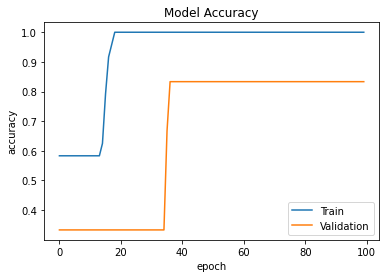

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model with three hidden layers

In [21]:
model2 = Sequential()
model2.add(Dense(512, activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(256, activation='relu'))

In [22]:
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               131072    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 303,682
Trainable params: 303,682
Non-trainable params: 0
_________________________________________________________________


In [23]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 2s - loss: 0.6944 - accuracy: 0.5833 - val_loss: 0.7036 - val_accuracy: 0.3333 - 2s/epoch - 883ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6541 - accuracy: 0.6667 - val_loss: 0.7132 - val_accuracy: 0.3333 - 58ms/epoch - 29ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6170 - accuracy: 0.7500 - val_loss: 0.7324 - val_accuracy: 0.3333 - 65ms/epoch - 33ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5664 - accuracy: 0.8333 - val_loss: 0.7565 - val_accuracy: 0.3333 - 63ms/epoch - 32ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5001 - accuracy: 0.9167 - val_loss: 0.7830 - val_accuracy: 0.3333 - 63ms/epoch - 31ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4194 - accuracy: 0.9583 - val_loss: 0.8234 - val_accuracy: 0.3333 - 67ms/epoch - 34ms/step
Epoch 7/100
2/2 - 0s - loss: 0.3294 - accuracy: 1.0000 - val_loss: 0.8776 - val_accuracy: 0.3333 - 58ms/epoch - 29ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2401 - accuracy: 1.0000 - val_loss: 0.9071 - val_accuracy: 0.3333 - 57ms/epoch - 29ms/step
Epoch 9/100
2/2 - 0s - lo

In [24]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 46ms/step - loss: 1.2511 - accuracy: 0.3000


[1.2510502338409424, 0.30000001192092896]

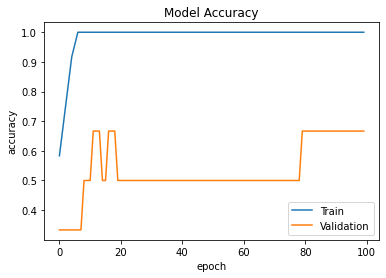

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model with two hidden layers

In [26]:
model3 = Sequential()
model3.add(Dense(1028, activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(2, activation='sigmoid')) #output layer
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1028)              263168    
                                                                 
 dense_12 (Dense)            (None, 512)               526848    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 2)                 514       
                                                                 
Total params: 921,858
Trainable params: 921,858
Non-trainable params: 0
_________________________________________________________________


In [27]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 2s - loss: 0.6964 - accuracy: 0.4167 - val_loss: 0.7194 - val_accuracy: 0.3333 - 2s/epoch - 833ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6033 - accuracy: 0.8333 - val_loss: 0.7335 - val_accuracy: 0.3333 - 72ms/epoch - 36ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5036 - accuracy: 1.0000 - val_loss: 0.7483 - val_accuracy: 0.3333 - 73ms/epoch - 36ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3719 - accuracy: 1.0000 - val_loss: 0.8166 - val_accuracy: 0.3333 - 69ms/epoch - 34ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2330 - accuracy: 1.0000 - val_loss: 0.8535 - val_accuracy: 0.5000 - 66ms/epoch - 33ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1092 - accuracy: 1.0000 - val_loss: 0.7937 - val_accuracy: 0.5000 - 68ms/epoch - 34ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0392 - accuracy: 1.0000 - val_loss: 0.6853 - val_accuracy: 0.5000 - 74ms/epoch - 37ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.5714 - val_accuracy: 0.6667 - 77ms/epoch - 39ms/step
Epoch 9/100
2/2 - 0s - lo

In [28]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 47ms/step - loss: 2.2943 - accuracy: 0.5000


[2.2943434715270996, 0.5]

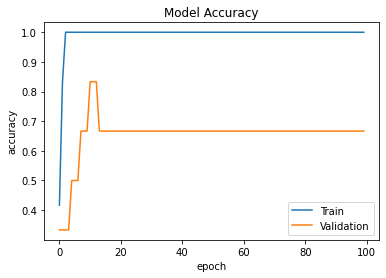

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model with one hidden layer

In [30]:
model4 = Sequential()
model4.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(2, activation='sigmoid')) #output layer
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                16384     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 18,530
Trainable params: 18,530
Non-trainable params: 0
_________________________________________________________________


In [31]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model4.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 2s - loss: 0.7008 - accuracy: 0.2917 - val_loss: 0.6823 - val_accuracy: 0.5000 - 2s/epoch - 928ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6889 - accuracy: 0.5833 - val_loss: 0.6837 - val_accuracy: 0.5000 - 60ms/epoch - 30ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6793 - accuracy: 0.7083 - val_loss: 0.6844 - val_accuracy: 0.5000 - 57ms/epoch - 28ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6709 - accuracy: 0.7917 - val_loss: 0.6847 - val_accuracy: 0.5000 - 55ms/epoch - 28ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6623 - accuracy: 0.8333 - val_loss: 0.6848 - val_accuracy: 0.5000 - 65ms/epoch - 33ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6537 - accuracy: 0.8333 - val_loss: 0.6843 - val_accuracy: 0.5000 - 56ms/epoch - 28ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6456 - accuracy: 0.9167 - val_loss: 0.6839 - val_accuracy: 0.5000 - 57ms/epoch - 29ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6377 - accuracy: 0.9167 - val_loss: 0.6833 - val_accuracy: 0.6667 - 57ms/epoch - 28ms/step
Epoch 9/100
2/2 - 0s - lo

In [32]:
model4.evaluate(X_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 1.1434 - accuracy: 0.3000


[1.1434142589569092, 0.30000001192092896]

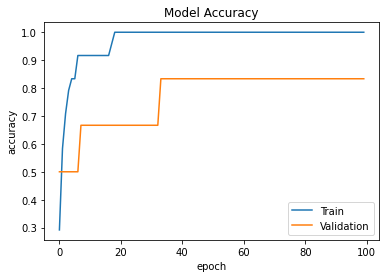

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()